Import necessary modules

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import *

Download cat/dog dataset

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip -P /content/catdog

--2021-08-23 10:41:25--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 80.67.92.138, 2a02:26f0:e3:38b::e59, 2a02:26f0:e3:396::e59
Connecting to download.microsoft.com (download.microsoft.com)|80.67.92.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/content/catdog/kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   135MB/s    in 6.3s    

2021-08-23 10:41:32 (126 MB/s) - ‘/content/catdog/kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



Unzip the zipped dataset

In [2]:
!unzip "/content/catdog/kagglecatsanddogs_3367a.zip" -d "/content/catdog/data/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/catdog/data/PetImages/Dog/5500.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5501.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5502.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5503.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5504.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5505.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5506.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5507.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5508.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5509.jpg  
  inflating: /content/catdog/data/PetImages/Dog/551.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5510.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5511.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5512.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5513.jpg  
  inflating: /content/catdog/data/PetImages/Dog/5514.jpg  
  infl

Remove Unwanted Images

In [5]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("/content/catdog/data/PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


In [73]:
import os

filepath = []
label = []

directory = '/content/catdog/data/PetImages'

for filename in os.listdir(directory):

  print(filename)
  image = os.path.join(directory,filename)
  for file in os.listdir(image):
    filepath.append(os.path.join(image,file))
    if filename=='Cat':
      label.append(1)
    else:
      label.append(0)
    print(os.path.join(image,file))

  
  
    # if filename.endswith(".txt"):
    #   #do smth
    #   continue
    # else:
    # continue

Streaming output truncated to the last 5000 lines.
/content/catdog/data/PetImages/Cat/3963.jpg
/content/catdog/data/PetImages/Cat/773.jpg
/content/catdog/data/PetImages/Cat/1898.jpg
/content/catdog/data/PetImages/Cat/8129.jpg
/content/catdog/data/PetImages/Cat/4162.jpg
/content/catdog/data/PetImages/Cat/8932.jpg
/content/catdog/data/PetImages/Cat/9513.jpg
/content/catdog/data/PetImages/Cat/5449.jpg
/content/catdog/data/PetImages/Cat/137.jpg
/content/catdog/data/PetImages/Cat/8408.jpg
/content/catdog/data/PetImages/Cat/7750.jpg
/content/catdog/data/PetImages/Cat/7450.jpg
/content/catdog/data/PetImages/Cat/1579.jpg
/content/catdog/data/PetImages/Cat/4178.jpg
/content/catdog/data/PetImages/Cat/2289.jpg
/content/catdog/data/PetImages/Cat/12030.jpg
/content/catdog/data/PetImages/Cat/3957.jpg
/content/catdog/data/PetImages/Cat/9538.jpg
/content/catdog/data/PetImages/Cat/3932.jpg
/content/catdog/data/PetImages/Cat/12400.jpg
/content/catdog/data/PetImages/Cat/4598.jpg
/content/catdog/data/PetI

In [111]:
u = []
for d in filepath:
  u.append(d.split('.')[-1])

In [112]:
set(u)

{'jpg'}

In [113]:
u.index('db')

ValueError: ignored

In [114]:
del filepath[13737]
del label[13737]

In [115]:
def read_image(imagefile,label):
  image = tf.io.read_file(imagefile)
  image = tf.image.decode_image(image, channels=3,dtype=tf.float32, expand_animations = False)
  resized_image = tf.image.resize(image, [64, 64])


  return resized_image,label



# def augment()

In [116]:
ds_train = tf.data.Dataset.from_tensor_slices((filepath,label))

In [117]:
ds_train = ds_train.map(read_image).batch(32)

Model

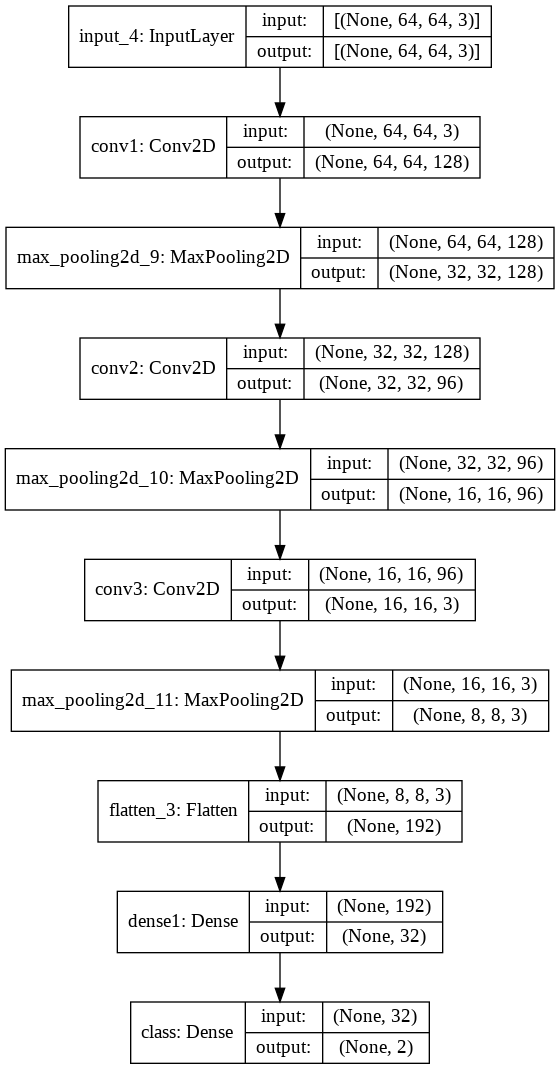

In [118]:
input = Input(shape=(64,64,3)) # the shape of every input is 28x28 = 784

layer1 = Conv2D(128,5,activation='relu', name = 'conv1', padding = 'same')(input) # filters = 128, kernel size = 5, padded convolutions
layer1mp = MaxPool2D()(layer1) # 28,28,128 -->  14,14,128
layer2 = Conv2D(96,3,activation='relu', name = 'conv2', padding = 'same')(layer1mp)
layer2mp = MaxPool2D()(layer2) # 14,14,96 -->  7,7,96
layer3 = Conv2D(3,11,activation='relu', name = 'conv3', padding = 'same')(layer2mp)
layer3mp = MaxPool2D()(layer3)  # 7,7,64 -->  3,3,64
flatten = Flatten()(layer3mp)  #3,3,64 --> 3*3*64
dense1 = Dense(32,activation='relu', name ='dense1')(flatten)
output = Dense(2,activation='softmax', name ='class')(dense1) # activation is softmax for classifiying into 10 classes 

classifier = keras.Model(input,output)
tf.keras.utils.plot_model(classifier,show_shapes=True, show_layer_names=True)

In [119]:
# compile the model

classifier.compile(optimizer = keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

# sparse_categorical_crossentropy is the loss function for sparsly coded labels. 
# eg: shape of y_train = (?,)/(?,1) i.e. single label and not an array

In [ ]:
l=0
for epoch in range(100):
  print(epoch)
  l=0
  for X,y in ds_train:
    losses = classifier.train_on_batch(X,y)
    l+=losses[0]
  print(l/len(ds_train))

